<a href="https://colab.research.google.com/github/gongliangz/AppliedNLPMaterial/blob/master/Advanced_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Content Copyright by Gongliang Zhang*  

# Web scraping

HTML (Hypertext Markup Language) is the standard markup language used to create webpages.

In [ ]:
# Basic Structure of an HTML Page, from chatgpt

<!DOCTYPE html> # HTML documen always starts with this declaration, telling the browser to know its an HTML file
<html lang="en"> # The blocks of the HTML document is placed between <html> and </html>
<head> #  Meta data and script connections (like a link to a CSS file or a JS file) are often placed in the <head> block
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>My First HTML Page</title> # The title tag defines the title of the webpage (its what shows up in the tab of a website)
</head>
<body> # Content between <body> and </body> tags are the block display in browse
    <h1>Welcome to My Website</h1> #  Headings are defined by the <h1> through <h6> tags, representing the hierarchy of the heading
    <p>This is a simple webpage created using HTML.</p> # Paragraphs are defined by the <p> tag
</body>
</html>

In [ ]:
# Scraping guidelines: Have website scraping permission
#  Grabbing the title of a page
import requests
import bs4

In [ ]:
# Step 1: Use the requests to grab the content of a page
res = requests.get("http://quotes.toscrape.com/")
res.text

'<!DOCTYPE html>\n<html lang="en">\n<head>\n\t<meta charset="UTF-8">\n\t<title>Quotes to Scrape</title>\n    <link rel="stylesheet" href="/static/bootstrap.min.css">\n    <link rel="stylesheet" href="/static/main.css">\n    \n    \n</head>\n<body>\n    <div class="container">\n        <div class="row header-box">\n            <div class="col-md-8">\n                <h1>\n                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>\n                </h1>\n            </div>\n            <div class="col-md-4">\n                <p>\n                \n                    <a href="/login">Login</a>\n                \n                </p>\n            </div>\n        </div>\n    \n\n<div class="row">\n    <div class="col-md-8">\n\n    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">\n        <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>\

<table>

<thead >
<tr>
<th>
<p>Syntax to pass to the .select() method</p>
</th>
<th>
<p>Match Results</p>
</th>
</tr>
</thead>
<tbody>
<tr>
<td>
<p><code>soup.select('div')</code></p>
</td>
<td>
<p>All elements with the <code>&lt;div&gt;</code> tag</p>
</td>
</tr>
<tr>
<td>
<p><code>soup.select('#some_id')</code></p>
</td>
<td>
<p>The HTML element containing the <code>id</code> attribute of <code>some_id</code></p>
</td>
</tr>
<tr>
<td>
<p><code>soup.select('.notice')</code></p>
</td>
<td>
<p>All the HTML elements with the CSS <code>class</code> named <code>notice</code></p>
</td>
</tr>
<tr>
<td>
<p><code>soup.select('div span')</code></p>
</td>
<td>
<p>Any elements named <code>&lt;span&gt;</code> that are within an element named <code>&lt;div&gt;</code></p>
</td>
</tr>
<tr>
<td>
<p><code>soup.select('div &gt; span')</code></p>
</td>
<td>
<p>Any elements named <code class="literal2">&lt;span&gt;</code> that are <span><em >directly</em></span> within an element named <code class="literal2">&lt;div&gt;</code>, with no other element in between</p>
</td>
</tr>
<tr>

</tr>
</tbody>
</table>

In [ ]:
# soup.select(".author")
soup = bs4.BeautifulSoup(res.text,"lxml")
authors = set()
for name in soup.select(".author"):
    authors.add(name.text)
authors

{'Albert Einstein',
 'André Gide',
 'Eleanor Roosevelt',
 'J.K. Rowling',
 'Jane Austen',
 'Marilyn Monroe',
 'Steve Martin',
 'Thomas A. Edison'}

In [ ]:
quotes = []
for quote in soup.select(".text"):
    quotes.append(quote.text)
quotes

['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”',
 '“It is our choices, Harry, that show what we truly are, far more than our abilities.”',
 '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”',
 '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”',
 "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”",
 '“Try not to become a man of success. Rather become a man of value.”',
 '“It is better to be hated for what you are than to be loved for what you are not.”',
 "“I have not failed. I've just found 10,000 ways that won't work.”",
 "“A woman is like a tea bag; you never know how strong it is until it's in hot water.”",
 '“A day without sunshine is like, you know, night.”']

In [ ]:
# soup.select(".author")
soup = bs4.BeautifulSoup(res.text,"lxml")
#soup, get the title
title_tag = soup.select('title')
title_tag [0]

<title>MedStar Health - Healthcare Provider | Maryland, DC, Virginia</title>

In [ ]:
# Get an image from a website
import requests
import os
from bs4 import BeautifulSoup

# URL of the webpage
url = "https://www.chesshistory.com/winter/extra/computers.html"

# Send an HTTP request to the page
response = requests.get(url)
soup = BeautifulSoup(response.text, "lxml")

# Create a folder to save images
os.makedirs("downloaded_images", exist_ok=True)

# Find all image tags
images = soup.find_all("img")

# Loop through images and save them
for i, img in enumerate(images):
    img_url = img.get("src")  # Extract image URL
    if img_url:
        # Handle relative URLs by prepending the base URL
        if img_url.startswith("//"):
            full_url = "https:" + img_url
        elif img_url.startswith("/"):
            full_url = "https://www.chesshistory.com" + img_url # Prepend base URL for relative paths starting with '/'
        else:
            full_url = url + img_url if not img_url.startswith('http') else img_url # Handle relative paths starting without '/' or absolute URLs

        # Download and save the image
        img_data = requests.get(full_url).content
        img_name = f"downloaded_images/image_{i}.jpg"

        with open(img_name, "wb") as f:
            f.write(img_data)

        print(f"Downloaded: {img_name}")

print("Image scraping completed!")

Downloaded: downloaded_images/image_0.jpg
Downloaded: downloaded_images/image_1.jpg
Downloaded: downloaded_images/image_2.jpg
Downloaded: downloaded_images/image_3.jpg
Downloaded: downloaded_images/image_4.jpg
Downloaded: downloaded_images/image_5.jpg
Downloaded: downloaded_images/image_6.jpg
Downloaded: downloaded_images/image_7.jpg
Downloaded: downloaded_images/image_8.jpg
Downloaded: downloaded_images/image_9.jpg
Downloaded: downloaded_images/image_10.jpg
Downloaded: downloaded_images/image_11.jpg
Downloaded: downloaded_images/image_12.jpg
Downloaded: downloaded_images/image_13.jpg
Downloaded: downloaded_images/image_14.jpg
Downloaded: downloaded_images/image_15.jpg
Downloaded: downloaded_images/image_16.jpg
Downloaded: downloaded_images/image_17.jpg
Downloaded: downloaded_images/image_18.jpg
Downloaded: downloaded_images/image_19.jpg
Downloaded: downloaded_images/image_20.jpg
Downloaded: downloaded_images/image_21.jpg
Downloaded: downloaded_images/image_22.jpg
Downloaded: downloade

In [ ]:

open('/content/downloaded_images/image_1.jpg','wb')

<_io.BufferedWriter name='/content/downloaded_images/image_1.jpg'>

# Image

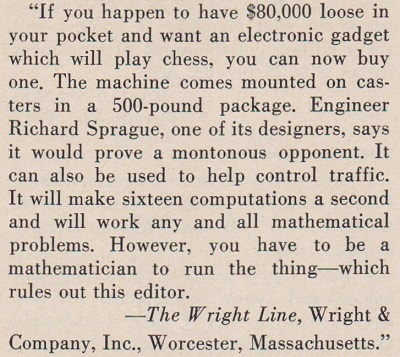

In [ ]:
# Use Pillow to open image files.
from PIL import Image
img = Image.open('/content/downloaded_images/image_11.jpg')
img

In [ ]:
img.size
#img.filename
#img.format_description

(400, 357)

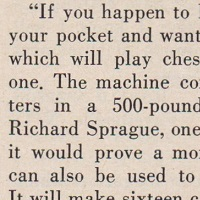

In [ ]:
# Crop Images
img.crop((0,0,200,200))

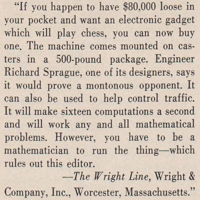

In [ ]:
# Resize
h,w = img.size
img.resize((200,200))

In [ ]:
# Rotate
img.rotate(90)
img.save("img_rotate.png")

# PDF

[Manipulating PDFs with Python](https://www.binpress.com/manipulate-pdf-python/)

In [ ]:
# PyPDF2: Not all pdf files can be read with this library. Files that are too blurry,encrypted or have a special encoding may not be recognized
#!pip install PyPDF2
import PyPDF2

In [ ]:
# Read pdf

f = open('/content/sample_data/CMS1028v3-eCQMFlow PC-07.pdf','rb')
pdf_reader = PyPDF2.PdfReader(f)
len(pdf_reader.pages) # Get the page count
page_number = 0
page_one = pdf_reader.pages[0]
page_one_text = page_one.extract_text()
page_one_text
f.close()

In [ ]:
# Concat all text content
pdf_text = []
pdf_reader = PyPDF2.PdfReader(f)
for p in range(len(pdf_reader.pages)):
    page = pdf_reader.pages[0]
    pdf_text.append(page.extract_text())

In [ ]:
import re
pattern = r'\d{3}'
all_text = ''

for n in range(len(pdf_reader.pages)):
    page = pdf_reader.pages[n]
    page_text = page.extract_text()
    all_text = all_text+' '+page_text

for match in re.finditer(pattern,all_text):
    print(match)

<re.Match object; span=(1, 4), match='120'>
<re.Match object; span=(23, 26), match='102'>
<re.Match object; span=(355, 358), match='202'>
<re.Match object; span=(1294, 1297), match='220'>
<re.Match object; span=(1314, 1317), match='102'>
<re.Match object; span=(2686, 2689), match='280'>
<re.Match object; span=(3493, 3496), match='202'>
<re.Match object; span=(3498, 3501), match='320'>
<re.Match object; span=(3520, 3523), match='102'>
<re.Match object; span=(4441, 4444), match='202'>
<re.Match object; span=(4446, 4449), match='420'>
<re.Match object; span=(4468, 4471), match='102'>
<re.Match object; span=(5886, 5889), match='202'>
<re.Match object; span=(5891, 5894), match='520'>
<re.Match object; span=(5913, 5916), match='102'>
<re.Match object; span=(7444, 7447), match='000'>
<re.Match object; span=(7452, 7455), match='000'>
<re.Match object; span=(7463, 7466), match='000'>
<re.Match object; span=(7568, 7571), match='100'>
<re.Match object; span=(7625, 7628), match='202'>
<re.Match ob

In [ ]:
for n in range(len(pdf_reader.pages)):
    page = pdf_reader.pages[n]
    page_text = page.extract_text()
    matchx = re.search(pattern,page_text)

    if match:
        print(matchx.group())

120
220
320
420
520
620
720
820
920
102
112
122


# Email

Main Server Domain Name for the top email services.

<table>

<tr>
    <th>Provider</th>
    <th>SMTP server domain name </th>    
</tr>

<tr>
    <td>Gmail (will need App Password)</td>
    <td>smtp.gmail.com</td>
</tr>
<tr>
    <td>Yahoo Mail</td>
    <td>smtp.mail.yahoo.com</td>
</tr>
<tr>
    <td>Outlook.com/Hotmail.com</td>
    <td>smtp-mail.outlook.com</td>
    
</tr>

<tr>
    <td>AT&T</td>
    <td>smpt.mail.att.net (Use port 465)</td>
</tr>


<tr>
    <td>Verizon</td>
    <td>smtp.verizon.net (Use port 465) </td>
</tr>

<tr>
    <td>Comcast</td>
    <td>smtp.comcast.net</td>
</tr>

</table>

In [ ]:
# The Python smtplib library can create and send email.
# Create an STMP object that canlog you in to your email to send messages. If the portal number 587 does not work, try using 465 instead.

import smtplib

smtp_object = smtplib.SMTP('smtp.gmail.com',587)
smtp_object.ehlo() # ehlo() test the server connection, 250 indicates a successful connection.

(250,
 b'smtp.gmail.com at your service, [34.16.140.236]\nSIZE 35882577\n8BITMIME\nSTARTTLS\nENHANCEDSTATUSCODES\nPIPELINING\nCHUNKING\nSMTPUTF8')

In [ ]:
# 587 port uses TLS encryption,need to initiate by running the starttls() command. port 465 uses SSL and skip this step.
smtp_object.starttls()
# For hidden passwords
import getpass

In [ ]:
# For hidden passwords
import getpass
result = getpass.getpass("Type something here and it will be hidden: ")
# Or just use input()
#input("Enter your password")

Type something here and it will be hidden: ··········


In [ ]:
# Set-up 2 Factor Authentication, https://support.google.com/accounts/answer/185833?hl=en/.
email = getpass.getpass("gzhangfbr@gmail.com")
password = getpass.getpass("Enter your password: ")
smtp_object.login(email,password)


from_address = getpass.getpass("Enter your email: ")
to_address = getpass.getpass("Enter the email of the recipient: ")
subject = input("Enter the subject line: ")
message = input("Type out the message you want to send: ")
msg = "Subject: " + subject + '\n' + message
smtp_object.sendmail(from_address,to_address,msg)

smtp_object.quit()

gzhangfbr@gmail.com··········
Enter your password: ··········


SMTPNotSupportedError: SMTP AUTH extension not supported by server.

In [ ]:
result

'April@147258'